In [52]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 


In [53]:
df =sns.load_dataset('flights')
print(df.head())

# we get only yaer and month for the date , we need day also
#convert the date into YYYY-MM-DD format in new column named yearMonth



   year month  passengers
0  1949   Jan         112
1  1949   Feb         118
2  1949   Mar         132
3  1949   Apr         129
4  1949   May         121


In [54]:
df['yearMonth']= "01-"+df['month'].astype(str)+"-"+df['year'].astype(str)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
 3   yearMonth   144 non-null    object  
dtypes: category(1), int64(2), object(1)
memory usage: 4.0+ KB
None


In [55]:
#yearMonth is a type of object - we may have problems later,so convert it into datetime

df['yearMonth']= pd.to_datetime("01-"+df['month'].astype(str)+"-"+df['year'].astype(str))
print(df.head())
print(df.info)


   year month  passengers  yearMonth
0  1949   Jan         112 1949-01-01
1  1949   Feb         118 1949-02-01
2  1949   Mar         132 1949-03-01
3  1949   Apr         129 1949-04-01
4  1949   May         121 1949-05-01
<bound method DataFrame.info of      year month  passengers  yearMonth
0    1949   Jan         112 1949-01-01
1    1949   Feb         118 1949-02-01
2    1949   Mar         132 1949-03-01
3    1949   Apr         129 1949-04-01
4    1949   May         121 1949-05-01
..    ...   ...         ...        ...
139  1960   Aug         606 1960-08-01
140  1960   Sep         508 1960-09-01
141  1960   Oct         461 1960-10-01
142  1960   Nov         390 1960-11-01
143  1960   Dec         432 1960-12-01

[144 rows x 4 columns]>


In [56]:
df.set_index('yearMonth',inplace=True)  # inplace will make changes permanently

print(df.head())

            year month  passengers
yearMonth                         
1949-01-01  1949   Jan         112
1949-02-01  1949   Feb         118
1949-03-01  1949   Mar         132
1949-04-01  1949   Apr         129
1949-05-01  1949   May         121


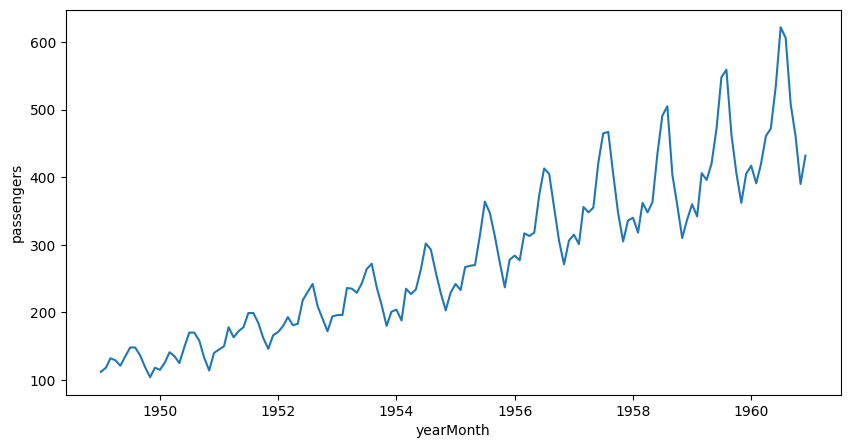

In [57]:
# now plot
plt.figure(figsize=(10,5))
sns.lineplot(data=df,x=df.index,y=df.passengers)
plt.show()

In [58]:
# The graph will show patterns

In [59]:
# Calculate and plot the rolling mean and deviation for 12 months
df['rollMean']= df.passengers.rolling(window=12).mean()
df['rollStd'] = df.passengers.rolling(window=12).std()

print(df['rollMean'])
print(df['rollStd'])

yearMonth
1949-01-01           NaN
1949-02-01           NaN
1949-03-01           NaN
1949-04-01           NaN
1949-05-01           NaN
                 ...    
1960-08-01    463.333333
1960-09-01    467.083333
1960-10-01    471.583333
1960-11-01    473.916667
1960-12-01    476.166667
Name: rollMean, Length: 144, dtype: float64
yearMonth
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
                ...    
1960-08-01    83.630500
1960-09-01    84.617276
1960-10-01    82.541954
1960-11-01    79.502382
1960-12-01    77.737125
Name: rollStd, Length: 144, dtype: float64


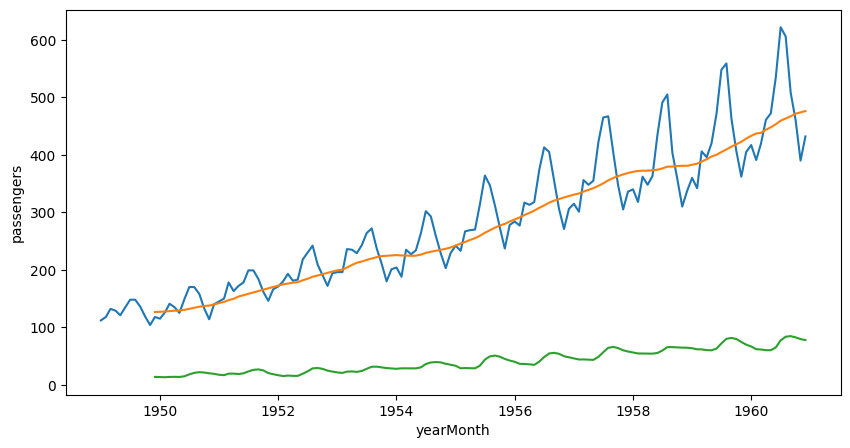

In [60]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df,x=df.index,y=df.passengers)
sns.lineplot(data=df,x=df.index,y=df.rollMean)

sns.lineplot(data=df,x=df.index,y=df.rollStd)

plt.show()

In [61]:
# conclusion : Measn is not stationary ,Sd is stationary , soour time series is not stationary.

In [62]:
# Now let us perform ADF test

from statsmodels.tsa.stattools import adfuller
adfTest =adfuller(df['passengers'])
print(adfTest)
# let us interpret these values below by converting into a series

stats = pd.Series(adfTest[0:4],index=['Test Statistics','p-value','#lags','number of observations used'])
print(stats)

for key,values in adfTest[4].items():
    print("critically",key,":",values)



# we will see that our Test Statistics > Critical value in all the cases, so we do not reject the null hypothesis.
    #It means that our data is not stationary

(0.8153688792060482, 0.991880243437641, 13, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 996.692930839019)
Test Statistics                  0.815369
p-value                          0.991880
#lags                           13.000000
number of observations used    130.000000
dtype: float64
critically 1% : -3.4816817173418295
critically 5% : -2.8840418343195267
critically 10% : -2.578770059171598


            passengers  shift  shiftDiff
yearMonth                               
1949-01-01         112    NaN        NaN
1949-02-01         118    NaN        NaN
1949-03-01         132    NaN        NaN
1949-04-01         129    NaN        NaN
1949-05-01         121    NaN        NaN
1949-06-01         135    NaN        NaN
1949-07-01         148    NaN        NaN
1949-08-01         148    NaN        NaN
1949-09-01         136    NaN        NaN
1949-10-01         119    NaN        NaN
1949-11-01         104  112.0       -8.0
1949-12-01         118  118.0        0.0
1950-01-01         115  132.0      -17.0
1950-02-01         126  129.0       -3.0
1950-03-01         141  121.0       20.0
1950-04-01         135  135.0        0.0
1950-05-01         125  148.0      -23.0
1950-06-01         149  148.0        1.0
1950-07-01         170  136.0       34.0
1950-08-01         170  119.0       51.0
(0.8153688792060482, 0.991880243437641, 13, 130, {'1%': -3.4816817173418295, '5%': -2.884041834319

C:\Users\dbda\AppData\Local\Temp\ipykernel_15708\3162525295.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollMean']= dataFrame[var].rolling(window=12).mean()
C:\Users\dbda\AppData\Local\Temp\ipykernel_15708\3162525295.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollStd']= dataFrame[var].rolling(window=12).std()


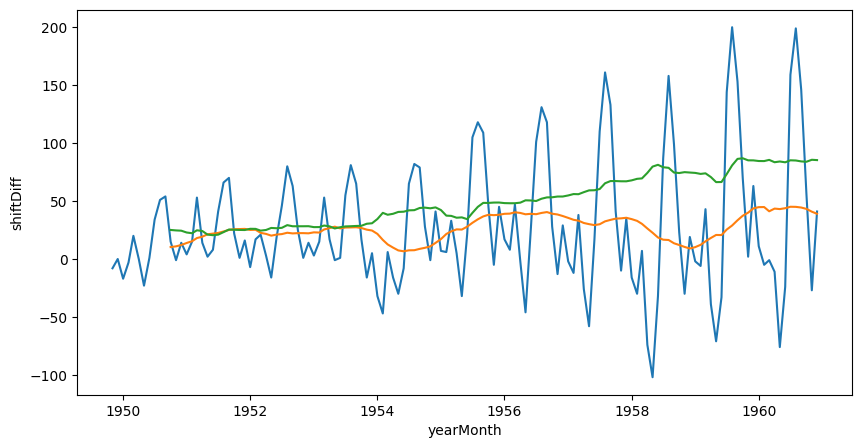

In [63]:
def test_stationarity(dataFrame, var):
    dataFrame['rollMean']= dataFrame[var].rolling(window=12).mean()
    dataFrame['rollStd']= dataFrame[var].rolling(window=12).std()
   
    from statsmodels.tsa.stattools import adfuller
    adfTest= adfuller(df['passengers'])
    print(adfTest)   # Let us interpret these values below by converting into a series
    stats= pd.Series(adfTest[0:4],index=['Test Statistic','P-value','#lags used','number of observations used'])
    print(stats)

    for key , values in adfTest[4].items():
        print('critically', key,":",values)
       
    plt.figure(figsize=(10,5))
    sns.lineplot(data=dataFrame,x=dataFrame.index, y=var)
    sns.lineplot(data=dataFrame,x=dataFrame.index, y='rollMean')
    sns.lineplot(data=dataFrame,x=dataFrame.index, y='rollStd')
    plt.show()



# By default shift is by 1 time period (here,one month)

# column -see slide
air_df=df[['passengers']].copy()
air_df['shift']=air_df.passengers.shift(10)
air_df['shiftDiff']= air_df['passengers']-air_df['shift']
print(air_df.head(20))

#Test Stationary
test_stationarity(air_df.dropna(),'shiftDiff')
# conclusion: The data has become somewhat stationary.

In [64]:
# ARIMA ###########################################################################

from  statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

# create columns for one month and one year lagged data 
airP = df[['passengers']].copy(deep=True)
airP['firstDiff'] =airP['passengers'].diff()
airP['Diff12']= airP['passengers'].diff(12)

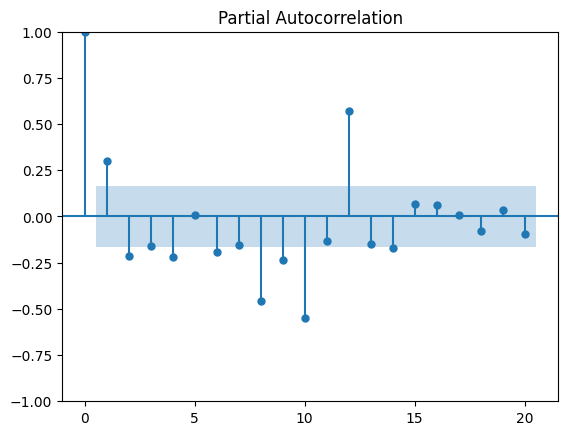

In [65]:
plot_pacf(airP['firstDiff'].dropna(),lags=20)
plt.show()

# shaded area is insignificant area
#PACF gives 2 auto regressive values (i.e. p )
#First 'p' is 1 (x axix coordinate), whose value is ~0.31 (the y axis coordinate)

In [66]:
# so significant values of p are 1, 2, 4, 6 etc


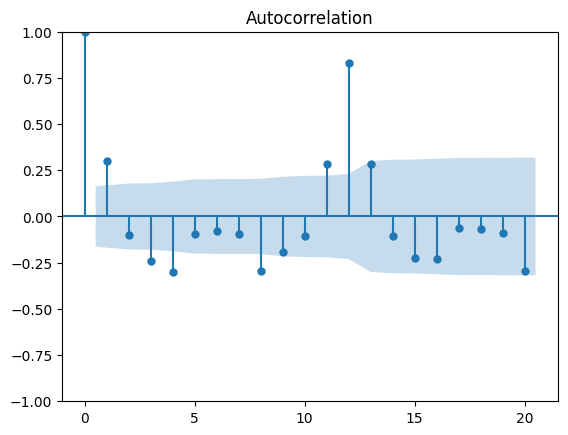

In [67]:
# Now let us take this value of p and find q , for which we need ACF 

plot_acf(airP['firstDiff'].dropna(),lags=20)
plt.show()

In [68]:
# Results of ACF are similar to that PACF
# Interpretation : we got q . Significant q values are 1, 3,4 ,8 etc


# let us take p=1, q=3 (both are significant) and d=1 (already known)



In [69]:
# Build a ARIMA model

train =airP[:round(len(airP)*70/100)]   # Take first 70% data
print(train.tail())    # jsut to check whether it ends

test = airP[round(len(airP)*70/100):]   # Take last 30% data , starting from 71

print(test.head())

            passengers  firstDiff  Diff12
yearMonth                                
1957-01-01         315        9.0    31.0
1957-02-01         301      -14.0    24.0
1957-03-01         356       55.0    39.0
1957-04-01         348       -8.0    35.0
1957-05-01         355        7.0    37.0
            passengers  firstDiff  Diff12
yearMonth                                
1957-06-01         422       67.0    48.0
1957-07-01         465       43.0    52.0
1957-08-01         467        2.0    62.0
1957-09-01         404      -63.0    49.0
1957-10-01         347      -57.0    41.0


In [70]:
model =ARIMA(train['passengers'],order=(1,1,3))   # parameters p,d,q

model_fit =model.fit()
prediction =model_fit.predict(start=test.index[0],end=test.index[-1])

airP['arimaPred']=prediction
print(airP.tail())


            passengers  firstDiff  Diff12   arimaPred
yearMonth                                            
1960-08-01         606      -16.0    47.0  341.111333
1960-09-01         508      -98.0    45.0  341.111333
1960-10-01         461      -47.0    54.0  341.111333
1960-11-01         390      -71.0    28.0  341.111333
1960-12-01         432       42.0    27.0  341.111333


c:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


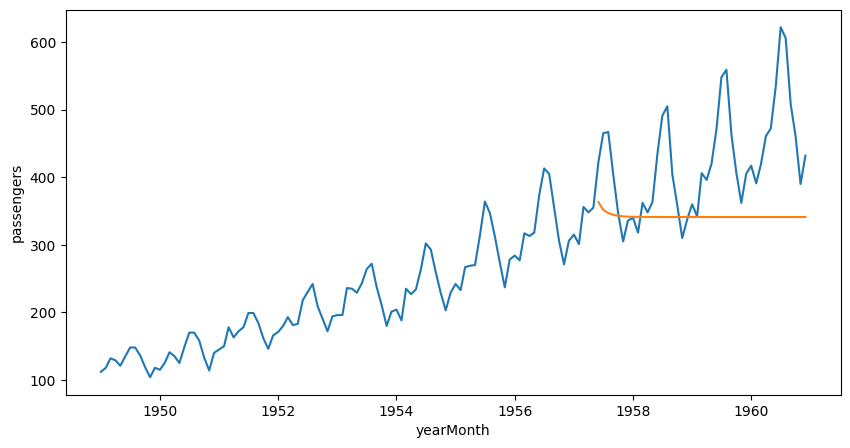

In [71]:
# plot 
plt.figure(figsize=(10,5))
sns.lineplot(data=airP,x=airP.index, y='passengers')
sns.lineplot(data=airP,x=airP.index, y='arimaPred')
plt.show()

# Conclusion L The ARIMA prediction is not Good

In [72]:
# SARIMAX prediction




from statsmodels.tsa.statespace.sarimax import SARIMAX

model= SARIMAX(train['passengers'],order=(1,1,3),seasonal_order=(2,1,2,12))

model_fit =model.fit()

prediction = model_fit.predict(start=test.index[0],end=test.index[-1])
airP['sarimaxPred'] =prediction

print(airP)

# now data looks better




c:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


            passengers  firstDiff  Diff12   arimaPred  sarimaxPred
yearMonth                                                         
1949-01-01         112        NaN     NaN         NaN          NaN
1949-02-01         118        6.0     NaN         NaN          NaN
1949-03-01         132       14.0     NaN         NaN          NaN
1949-04-01         129       -3.0     NaN         NaN          NaN
1949-05-01         121       -8.0     NaN         NaN          NaN
...                ...        ...     ...         ...          ...
1960-08-01         606      -16.0    47.0  341.111333   598.373416
1960-09-01         508      -98.0    45.0  341.111333   533.999473
1960-10-01         461      -47.0    54.0  341.111333   478.779131
1960-11-01         390      -71.0    28.0  341.111333   431.423580
1960-12-01         432       42.0    27.0  341.111333   476.788713

[144 rows x 5 columns]


            passengers  firstDiff  Diff12  arimaPred  sarimaxPred
yearMonth                                                        
1949-01-01         112        NaN     NaN        NaN          NaN
1949-02-01         118        6.0     NaN        NaN          NaN
1949-03-01         132       14.0     NaN        NaN          NaN
1949-04-01         129       -3.0     NaN        NaN          NaN
1949-05-01         121       -8.0     NaN        NaN          NaN


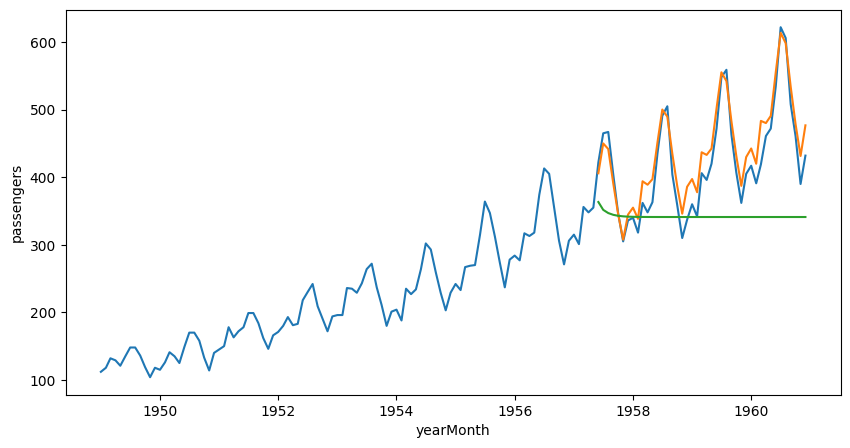

In [73]:
# plot 
airP.dropna()

print(airP.head())
plt.figure(figsize=(10,5))
sns.lineplot(data=airP,x=airP.index, y='passengers')
sns.lineplot(data=airP,x=airP.index, y='sarimaxPred')
sns.lineplot(data=airP,x=airP.index, y='arimaPred')

plt.show()


In [74]:
# compared to ARIMA SARIMAX is much better 

In [76]:
# future prediction
futureDate = pd.DataFrame(pd.date_range(start='1961-01-01', end='1962-12-01', freq='MS'), columns=['Dates'])
futureDate.set_index('Dates', inplace=True)
print(futureDate.head())


Empty DataFrame
Columns: []
Index: [1961-01-01 00:00:00, 1961-02-01 00:00:00, 1961-03-01 00:00:00, 1961-04-01 00:00:00, 1961-05-01 00:00:00]


In [77]:
# Predict and print

print(model_fit.predict(start=futureDate.index[0],end=futureDate.index[-1]))




1961-01-01    490.613293
1961-02-01    465.084870
1961-03-01    532.877232
1961-04-01    530.157226
1961-05-01    541.995914
1961-06-01    612.615966
1961-07-01    674.617501
1961-08-01    657.139792
1961-09-01    588.139065
1961-10-01    528.871039
1961-11-01    478.566836
1961-12-01    526.624381
1962-01-01    541.515029
1962-02-01    513.129582
1962-03-01    585.222051
1962-04-01    582.936345
1962-05-01    595.912413
1962-06-01    671.908278
1962-07-01    738.017183
1962-08-01    718.400250
1962-09-01    644.925399
1962-10-01    581.718299
1962-11-01    528.573613
1962-12-01    579.228374
Freq: MS, Name: predicted_mean, dtype: float64


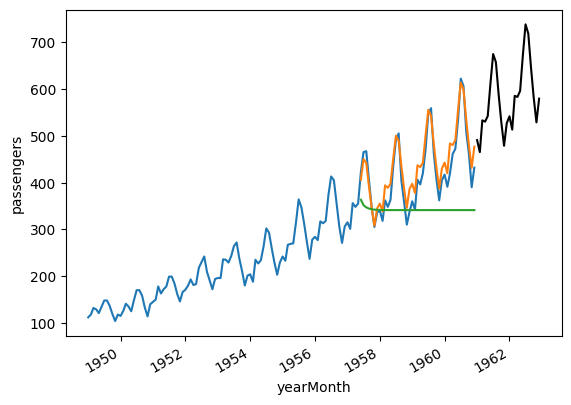

In [78]:
#plot 
airP.dropna()
sns.lineplot(data=airP,x=airP.index, y='passengers')
sns.lineplot(data=airP,x=airP.index, y='sarimaxPred')
sns.lineplot(data=airP,x=airP.index, y='arimaPred')

model_fit.predict(start=futureDate.index[0],end=futureDate.index[-1]).plot(color='black')
plt.show()

